In [1]:
!pip install arch

In [2]:
import matplotlib.pyplot as plt
from arch import arch_model
from tqdm import tqdm
import pandas as pd
import numpy as np
import os

daily_df = pd.read_csv("/content/simulated_daily_data.csv")
daily_df['Date'] = pd.to_datetime(daily_df['Date'])
daily_df.set_index('Date', inplace=True)

In [3]:
daily_df['log_return'] = np.log(daily_df['Adj Close']).diff()

In [4]:
daily_df.drop('Unnamed: 7', axis=1, inplace=True)

In [5]:
intraday_5min_df = pd.read_csv("/content/simulated_5min_data.csv")
intraday_5min_df

,datetime,open,low,high,close,volume,Unnamed: 6
0,9/29/2021 20:00,10379.7775,10364.5950,10398.7025,10370.9575,46,NaN
1,9/29/2021 20:05,10370.9425,10352.4175,10380.2500,10371.1450,53,NaN
2,9/29/2021 20:10,10372.8150,10357.8250,10388.7500,10384.3125,116,NaN
3,9/29/2021 20:15,10385.8275,10384.0825,10457.2000,10442.5175,266,NaN
4,9/29/2021 20:20,10442.5225,10426.2375,10448.0000,10440.9950,65,NaN
...,...,...,...,...,...,...,...
177872,9/20/2023 10:40,6792.1025,6783.6000,6796.2500,6790.1375,41,NaN
177873,9/20/2023 10:45,6790.5575,6779.1000,6795.7500,6781.9175,42,NaN
177874,9/20/2023 10:50,6781.5475,6779.3750,6790.2500,6783.9050,44,NaN
177875,9/20/2023 10:55,6783.9025,6779.9000,6793.2500,6782.0900,95,NaN


In [6]:
intraday_5min_df['datetime'] = pd.to_datetime(intraday_5min_df['datetime'])
intraday_5min_df.set_index('datetime', inplace=True)

In [7]:
intraday_5min_df.drop('Unnamed: 6', axis=1, inplace=True)

In [8]:
daily_df['variance'] = daily_df['log_return'].rolling(180).var()
daily_df = daily_df['2020-01-01':]

In [9]:
def predict_volatility(x):
  best_model = arch_model(y=x,p=1,q=3).fit(update_freq=5, disp='off')
  variance_forecast = best_model.forecast(horizon=1).variance.iloc[-1, 0]

  return variance_forecast

daily_df['predictions'] = daily_df['log_return'].rolling(180).apply(lambda x:  predict_volatility(x))
daily_df

Streaming output truncated to the last 5000 lines.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  self._check_scale(resids)
/usr/local/lib/python3.12/dist-packages/arch/univariate/base.py:694: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.001252. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  self._check_scale(resids)
/usr/local/lib/python3.12/dist-packages/arch/univariate/base.py:694: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.001262. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning

,Open,High,Low,Close,Adj Close,Volume,log_return,variance,predictions
Date,,,,,,,,,
2020-01-01,1798.723022,1813.582642,1793.736084,1800.043579,1800.043579,1.856566e+10,0.000914,0.001125,NaN
2020-01-02,1800.637817,1803.038818,1733.817505,1746.367554,1746.367554,2.080208e+10,-0.030273,0.001127,NaN
2020-01-03,1746.107178,1853.428833,1728.749023,1836.221069,1836.221069,2.811148e+10,0.050172,0.001139,NaN
2020-01-04,1836.343872,1856.846436,1827.378540,1852.664185,1852.664185,1.844427e+10,0.008915,0.001110,NaN
2020-01-05,1852.612915,1886.124268,1850.133911,1852.829346,1852.829346,1.972507e+10,0.000089,0.001106,NaN
...,...,...,...,...,...,...,...,...,...
2023-09-14,6557.069336,6693.655762,6542.862793,6634.918457,6634.918457,1.381136e+10,0.011801,0.000393,0.000334
2023-09-15,6633.454590,6710.124512,6560.175293,6652.173340,6652.173340,1.147974e+10,0.002597,0.000385,0.000292
2023-09-16,6651.549805,6688.692383,6618.472656,6642.070313,6642.070313,7.402031e+09,-0.001520,0.000384,0.000286


<Axes: xlabel='Date'>

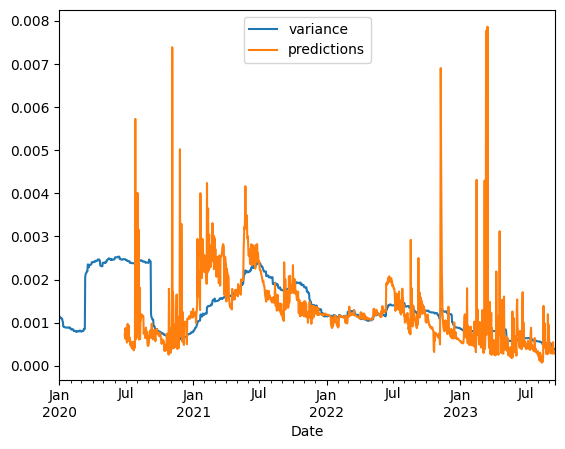

In [10]:
daily_df[['variance', 'predictions']].plot()

In [11]:
daily_df['prediction_premium'] = (daily_df['predictions'] - daily_df['variance'])/daily_df['variance']
daily_df['premium_std'] = daily_df['prediction_premium'].rolling(180).std()

In [12]:
daily_df

,Open,High,Low,Close,Adj Close,Volume,log_return,variance,predictions,prediction_premium,premium_std
Date,,,,,,,,,,,
2020-01-01,1798.723022,1813.582642,1793.736084,1800.043579,1800.043579,1.856566e+10,0.000914,0.001125,NaN,NaN,NaN
2020-01-02,1800.637817,1803.038818,1733.817505,1746.367554,1746.367554,2.080208e+10,-0.030273,0.001127,NaN,NaN,NaN
2020-01-03,1746.107178,1853.428833,1728.749023,1836.221069,1836.221069,2.811148e+10,0.050172,0.001139,NaN,NaN,NaN
2020-01-04,1836.343872,1856.846436,1827.378540,1852.664185,1852.664185,1.844427e+10,0.008915,0.001110,NaN,NaN,NaN
2020-01-05,1852.612915,1886.124268,1850.133911,1852.829346,1852.829346,1.972507e+10,0.000089,0.001106,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2023-09-14,6557.069336,6693.655762,6542.862793,6634.918457,6634.918457,1.381136e+10,0.011801,0.000393,0.000334,-0.151791,0.555509
2023-09-15,6633.454590,6710.124512,6560.175293,6652.173340,6652.173340,1.147974e+10,0.002597,0.000385,0.000292,-0.240812,0.552702
2023-09-16,6651.549805,6688.692383,6618.472656,6642.070313,6642.070313,7.402031e+09,-0.001520,0.000384,0.000286,-0.256794,0.552700


In [13]:
daily_df['signal_daily'] = daily_df.apply(lambda x: 1 if (x['prediction_premium']>x['premium_std']*1.5)
else (-1 if (x['prediction_premium']<x['premium_std']*1.5) else np.nan), axis=1)

In [14]:
daily_df['signal_daily'] = daily_df['signal_daily'].shift()

In [15]:
final_df = intraday_5min_df.reset_index().merge(daily_df[['signal_daily']].reset_index(), left_on = 'datetime', right_on='Date').set_index('datetime')

In [16]:
final_df.drop(columns=['Date'],inplace=True)

In [17]:
final_df

,open,low,high,close,volume,signal_daily
datetime,,,,,,
2021-09-30,10907.7500,10900.0000,10964.99626,10941.7325,240,-1.0
2021-10-01,10910.5900,10890.6750,10929.57250,10905.8500,30,-1.0
2021-10-02,11887.2500,11875.0000,11899.38750,11892.9850,24,-1.0
2021-10-04,11872.6075,11849.0000,11879.30500,11855.0000,70,-1.0
2021-10-05,12330.0375,12297.0475,12337.25000,12300.0675,33,-1.0
...,...,...,...,...,...,...
2023-09-13,6468.4500,6463.6000,6478.50000,6471.8475,21,-1.0
2023-09-14,6568.3750,6566.9025,6570.00000,6568.6400,6,-1.0
2023-09-15,6657.5250,6654.8925,6661.25000,6656.8625,10,-1.0


In [33]:
!pip install pandas-ta

  Attempting uninstall: pandas
    Found existing installation: pandas 2.2.2
    Uninstalling pandas-2.2.2:
      Successfully uninstalled pandas-2.2.2
  Attempting uninstall: numba
    Found existing installation: numba 0.60.0
    Uninstalling numba-0.60.0:
      Successfully uninstalled numba-0.60.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 2.3.3 which is incompatible.
tensorflow 2.19.0 requires numpy<2.2.0,>=1.26.0, but you have numpy 2.2.6 which is incompatible.


In [18]:
import pandas_ta

In [19]:
final_df['rsi'] = pandas_ta.rsi(close = final_df['close'], length = 20)
final_df['lband']  = pandas_ta.bbands(close = final_df['close'], length = 20).iloc[:,0]
final_df['uband']  = pandas_ta.bbands(close = final_df['close'], length = 20).iloc[:,2]

In [20]:
final_df['signal_intraday'] = final_df.apply(lambda x: 1 if ((x['rsi']>70)& (x['close']>x['uband']))
else (-1 if ((x['rsi']<30)& (x['close']<x['lband'])) else np.nan), axis=1)

In [21]:
final_df['return_sign'] = final_df.apply(lambda x: -1 if ((x['signal_daily']==1) & (x['signal_intraday']==1))
else (1 if ((x['signal_daily']== -1) & (x['signal_intraday']==-1)) else np.nan), axis=1)

In [25]:
final_df['return_sign'] = final_df.groupby(pd.Grouper(freq='D'))['return_sign'].transform(lambda x:x.ffill() )

In [26]:
final_df['return'] = final_df['close'].pct_change()
final_df['forward_return'] = final_df['return'].shift(-1)
final_df['strategy_return'] = final_df['forward_return']*final_df['return_sign']
daily_return_df = final_df.groupby(pd.Grouper(freq='D'))['strategy_return'].sum()

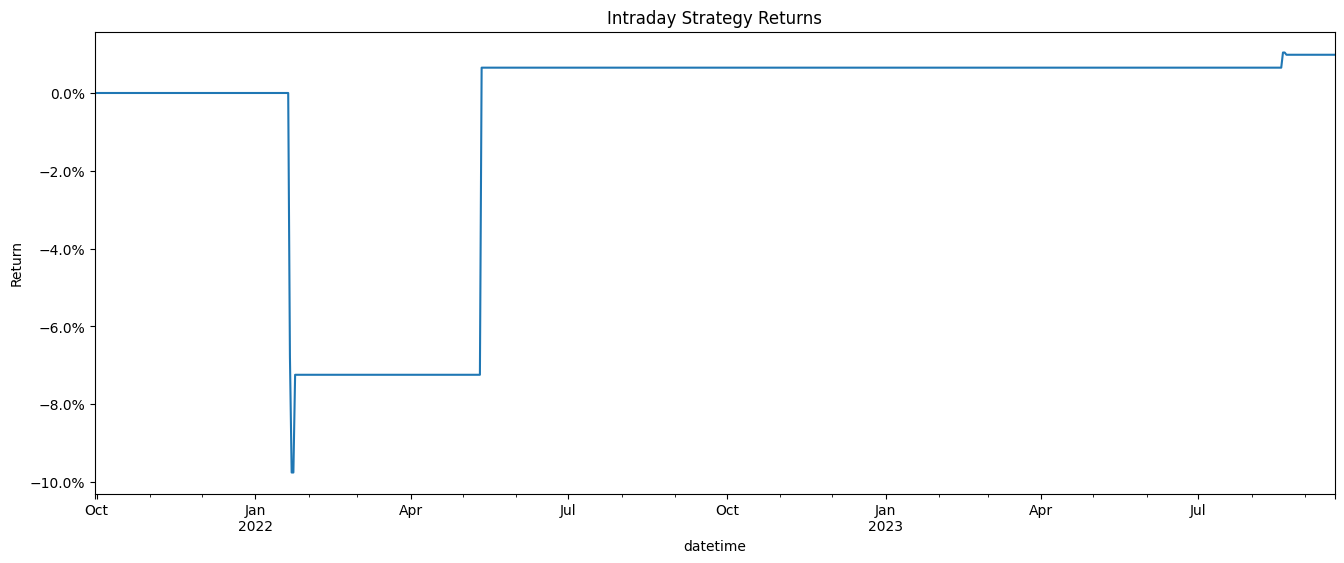

In [28]:
strategy_cumulative_return = np.exp(np.log1p(daily_return_df).cumsum()).sub(1)
strategy_cumulative_return.plot(figsize=(16,6))
plt.title('Intraday Strategy Returns')
plt.gca().yaxis.set_major_formatter(plt.matplotlib.ticker.PercentFormatter(1))
plt.ylabel('Return')
plt.show()